# Homework 1


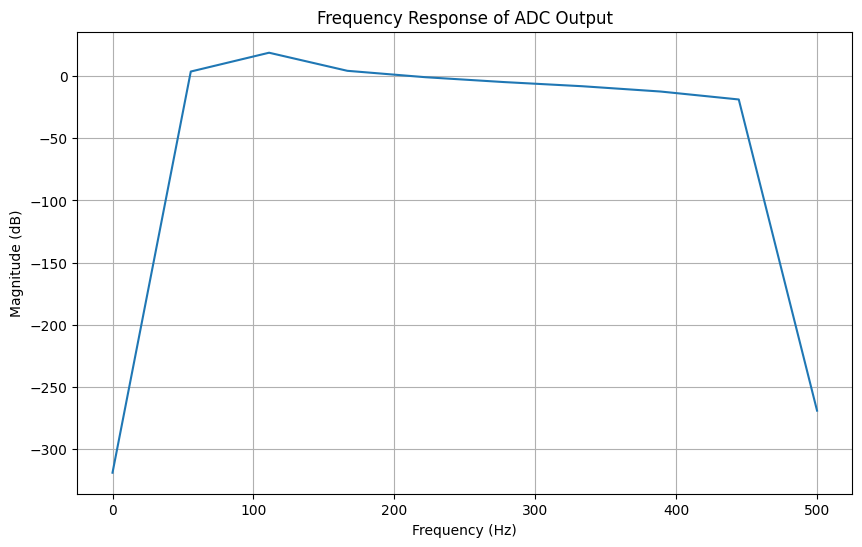

Symbolic magnitude response:
Abs(Sum(2*A*exp(-2.0*I*pi*f*n/f_s)*floor((2**N - 1)*sin(2*pi*f_in*n/f_s + phi)/2 + 0.5)/(2**N - 1), (n, -M, M)))


In [ ]:
#ended up not turning in this assignment, but I did what I could to try to check my work

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define symbolic variables
n = sp.Symbol('n', integer=True)
A, f_in, phi = sp.symbols('A f_in phi')
f_s = sp.Symbol('f_s', positive=True)  # Sampling frequency
N = sp.Symbol('N', integer=True, positive=True)  # Number of ADC bits
f = sp.Symbol('f')  # Frequency variable for DTFT

# Define the discrete-time input signal
x_n = A * sp.sin(2 * sp.pi * f_in * n / f_s + phi)

# Define the quantization process
Q = (2 * A) / (2**N - 1)  # Quantization step size
x_quantized = Q * sp.floor(x_n / Q + 0.5)

# Define the DTFT symbolically (using a finite sum)
M = sp.Symbol('M', integer=True, positive=True)  # Number of samples
X_f = sp.Sum(x_quantized * sp.exp(-2j * sp.pi * f * n / f_s), (n, -M, M))

# Compute the magnitude response
magnitude_response = sp.Abs(X_f)

# Create a function for numerical evaluation
magnitude_func = sp.lambdify((f_in, A, phi, f_s, N, M, f), magnitude_response, 'numpy')

# Plot the magnitude response
def plot_magnitude_response(f_in_val, A_val, phi_val, f_s_val, N_val, M_val, num_samples=10):
    f_values = np.linspace(0, f_s_val/2, num_samples)
    magnitude = np.zeros_like(f_values)
    
    for i, f_val in enumerate(f_values):
        magnitude[i] = magnitude_func(f_in_val, A_val, phi_val, f_s_val, N_val, M_val, f_val)
    
    plt.figure(figsize=(10, 6))
    plt.plot(f_values, 20 * np.log10(np.abs(magnitude)))
    plt.title('Frequency Response of ADC Output')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.grid(True)
    plt.show()

# Example usage
plot_magnitude_response(f_in_val=100, A_val=1, phi_val=0, f_s_val=1000, N_val=8, M_val=100)

# Print the symbolic expression for the magnitude response
print("Symbolic magnitude response:")
print(magnitude_response)
